In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df1 = pd.read_csv('/home/student/Desktop/dkakurkina/Hometask_3/data_after_3.csv')
df1.head()

,A,B,mu,alpha,homo,lumo,u0,lipinskiHBD,NumRotatableBonds,NumAmideBonds,...,n7aRing,n5FRing,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4,GGI5,TopoShapeIndex,gap
0,0.620166,0.234161,0.128198,0.508690,0.554353,0.856926,0.625002,0.166667,0.166667,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.745385,0.438596,0.666667,0.596362
1,0.484998,0.170089,0.083408,0.661187,0.630143,0.894118,0.618011,0.166667,0.166667,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.875385,0.000000,0.666667,0.574474
2,0.087701,0.267970,0.280996,0.586817,0.477696,0.745731,0.512052,0.500000,0.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.221538,0.000000,0.666667,0.563388
3,0.942149,0.243423,0.268082,0.444183,0.495886,0.565465,0.547543,0.166667,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.166154,0.219298,0.666667,0.416430
4,0.438825,0.313055,0.151055,0.411304,0.458207,0.538899,0.522597,0.166667,0.166667,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.519231,0.000000,1.000000,0.421262


In [8]:
df = pd.read_csv('/home/student/Desktop/dkakurkina/Hometask_4/data_after_4_pca.csv', index_col=0)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,,,,,,,,,,,,,,,,,,,,,
-0.604170,0.237525,0.283333,0.045588,0.527156,0.270242,1.145601,-0.170155,-0.169811,0.076630,0.054693,...,0.122803,0.025203,0.045760,0.072807,-0.149670,-0.011733,-0.069535,-0.012766,0.105858,-0.093760
-0.347135,0.139937,-0.258744,-0.121981,0.458532,0.508324,0.151736,0.306457,0.009194,0.138843,-0.015971,...,0.080862,-0.025267,-0.138390,0.128893,-0.031847,-0.107370,-0.068212,-0.071979,-0.044475,-0.132394
0.701499,-0.188413,-0.210452,0.072145,-0.213668,0.624503,-0.332767,0.160913,0.038727,0.064025,0.347949,...,0.000719,0.052153,-0.100764,-0.000448,0.120188,0.094319,-0.067703,-0.074843,-0.068034,-0.073349
0.013125,-0.510050,0.469134,-0.625589,0.334546,-0.261340,-0.274490,0.239957,0.123403,-0.662065,0.511011,...,-0.206139,-0.170027,-0.022951,0.098511,0.215221,0.271034,-0.178369,0.135966,0.132656,0.062851
-0.093144,0.580057,0.857155,0.287080,0.021263,-0.008520,0.805054,-0.513233,-0.090120,-0.356480,0.129567,...,-0.046059,-0.002790,-0.040465,0.115696,-0.155720,-0.063864,-0.033397,0.026735,0.035265,-0.028553


Разделим датасет на обучающую и тестовую выборки

In [9]:
X = df
y = df1['gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

Поиск наилучшей модели

In [10]:
models = {
    'xgb': XGBRegressor(),
    'rf': RandomForestRegressor(),
    'catboost': CatBoostRegressor()
}

In [11]:
# Инициализация кросс-валидации
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [12]:
# Перебор моделей
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    results[name] = scores.mean()

for name, score in results.items():
    print(f'{name}: R^2 = {score:.4f}')

Learning rate set to 0.064057
0:	learn: 0.1299499	total: 73.4ms	remaining: 1m 13s
1:	learn: 0.1263012	total: 83.8ms	remaining: 41.8s
2:	learn: 0.1227794	total: 91.2ms	remaining: 30.3s
3:	learn: 0.1195925	total: 97.6ms	remaining: 24.3s
4:	learn: 0.1163937	total: 104ms	remaining: 20.6s
5:	learn: 0.1135485	total: 109ms	remaining: 18.1s
6:	learn: 0.1109591	total: 116ms	remaining: 16.4s
7:	learn: 0.1086171	total: 123ms	remaining: 15.2s
8:	learn: 0.1063173	total: 129ms	remaining: 14.2s
9:	learn: 0.1042315	total: 135ms	remaining: 13.4s
10:	learn: 0.1023205	total: 142ms	remaining: 12.8s
11:	learn: 0.1004233	total: 149ms	remaining: 12.2s
12:	learn: 0.0985226	total: 155ms	remaining: 11.8s
13:	learn: 0.0968645	total: 161ms	remaining: 11.4s
14:	learn: 0.0955401	total: 168ms	remaining: 11s
15:	learn: 0.0943463	total: 176ms	remaining: 10.8s
16:	learn: 0.0928788	total: 182ms	remaining: 10.5s
17:	learn: 0.0915954	total: 189ms	remaining: 10.3s
18:	learn: 0.0903225	total: 195ms	remaining: 10.1s
19:	lear

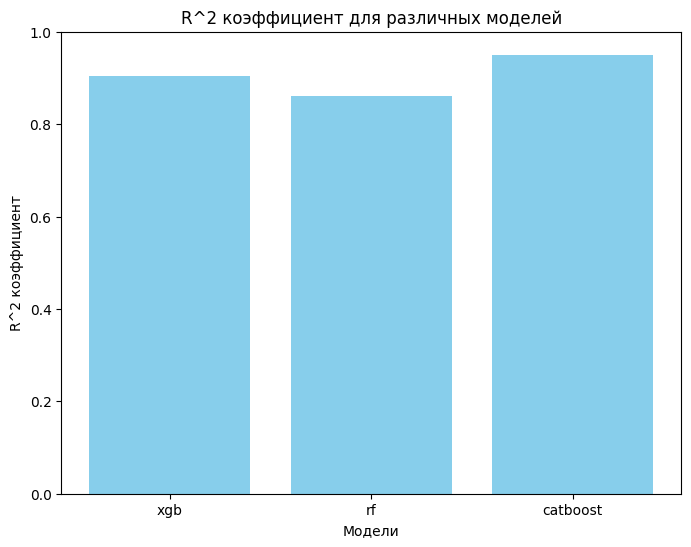

In [13]:
# Построим bar-plot
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Модели')
plt.ylabel('R^2 коэффициент')
plt.title('R^2 коэффициент для различных моделей')
plt.ylim(0, 1)
plt.show()

Обучение CatBoostRegressor

In [14]:
model = CatBoostRegressor()

model.fit(X_train,
          y_train
          )
y_pred = model.predict(X_test)

r2_initial = r2_score(y_test,
                      y_pred)

Learning rate set to 0.062876
0:	learn: 0.1305508	total: 6.65ms	remaining: 6.64s
1:	learn: 0.1269526	total: 12.9ms	remaining: 6.42s
2:	learn: 0.1234992	total: 18.9ms	remaining: 6.3s
3:	learn: 0.1202860	total: 24.9ms	remaining: 6.19s
4:	learn: 0.1172171	total: 30.6ms	remaining: 6.09s
5:	learn: 0.1144030	total: 36.5ms	remaining: 6.04s
6:	learn: 0.1118790	total: 43.3ms	remaining: 6.14s
7:	learn: 0.1094337	total: 49.3ms	remaining: 6.11s
8:	learn: 0.1071421	total: 55.2ms	remaining: 6.08s
9:	learn: 0.1050882	total: 61.2ms	remaining: 6.06s
10:	learn: 0.1030198	total: 67.2ms	remaining: 6.04s
11:	learn: 0.1011256	total: 73ms	remaining: 6.01s
12:	learn: 0.0993477	total: 78.8ms	remaining: 5.98s
13:	learn: 0.0978581	total: 84.8ms	remaining: 5.97s
14:	learn: 0.0963742	total: 90.8ms	remaining: 5.96s
15:	learn: 0.0951561	total: 96.6ms	remaining: 5.94s
16:	learn: 0.0937768	total: 102ms	remaining: 5.92s
17:	learn: 0.0925203	total: 108ms	remaining: 5.91s
18:	learn: 0.0912737	total: 114ms	remaining: 5.9s

In [15]:
# Подбор параметров с использованием GridSearch
param_grid = {'l2_leaf_reg':[4],
              'learning_rate':[0.1],
              'depth':[8],
              'iterations':[2000]
}
model = CatBoostRegressor()

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=3,
                    scoring='neg_root_mean_squared_error',
                    verbose=0
                    ) # 3-fold cross-validation is used for faster estimation of parameters combinations

grid.fit(X_train,
         y_train
         )
grid.best_params_

0:	learn: 0.1280099	total: 22.4ms	remaining: 44.7s
1:	learn: 0.1222632	total: 42.8ms	remaining: 42.8s
2:	learn: 0.1167493	total: 61.9ms	remaining: 41.2s
3:	learn: 0.1119104	total: 81ms	remaining: 40.4s
4:	learn: 0.1073208	total: 100ms	remaining: 40.1s
5:	learn: 0.1031526	total: 120ms	remaining: 39.7s
6:	learn: 0.0996487	total: 138ms	remaining: 39.4s
7:	learn: 0.0965962	total: 158ms	remaining: 39.4s
8:	learn: 0.0937667	total: 177ms	remaining: 39.2s
9:	learn: 0.0910493	total: 197ms	remaining: 39.2s
10:	learn: 0.0887000	total: 216ms	remaining: 39.1s
11:	learn: 0.0867244	total: 236ms	remaining: 39.1s
12:	learn: 0.0847976	total: 255ms	remaining: 39s
13:	learn: 0.0827949	total: 275ms	remaining: 39s
14:	learn: 0.0811024	total: 295ms	remaining: 39s
15:	learn: 0.0793266	total: 314ms	remaining: 39s
16:	learn: 0.0780588	total: 333ms	remaining: 38.9s
17:	learn: 0.0768538	total: 352ms	remaining: 38.8s
18:	learn: 0.0757056	total: 372ms	remaining: 38.8s
19:	learn: 0.0745835	total: 391ms	remaining: 38

{'depth': 8, 'iterations': 2000, 'l2_leaf_reg': 4, 'learning_rate': 0.1}

In [16]:
# Сохранение параметров для построения графиков
optimized_model = grid.best_estimator_ # We take the best hyperparameters set for later use
y_pred_optimized = optimized_model.predict(X_test)
r2_optimized = r2_score(y_test,
                        y_pred_optimized
                        )

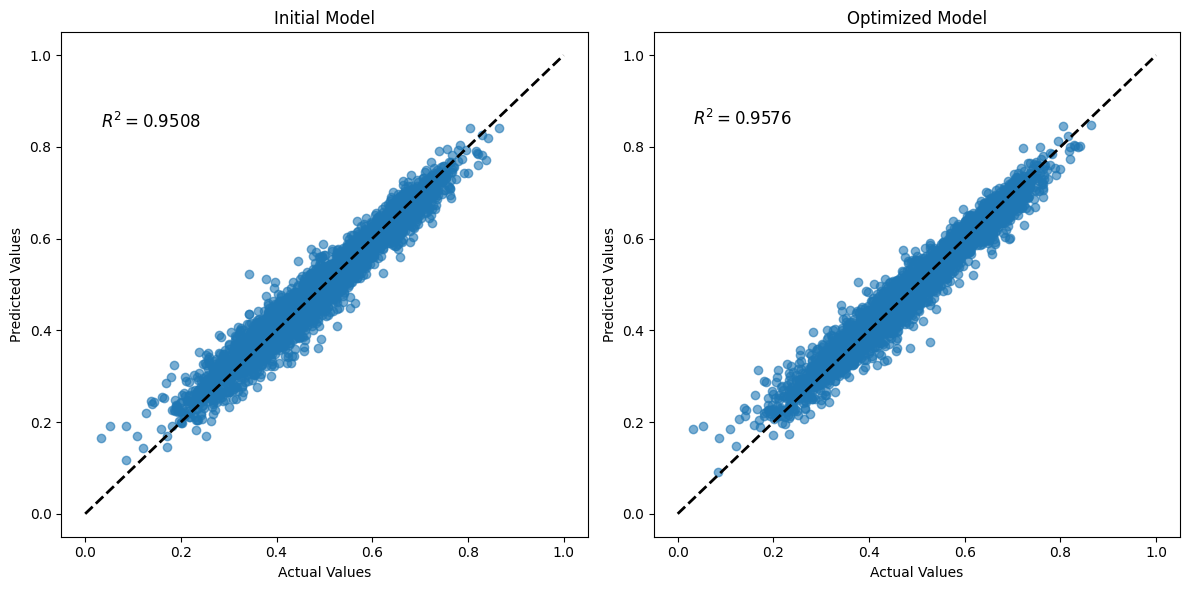

In [17]:
# Построение графиков
plt.figure(figsize=(12, 6))

# Here is the vizualization of the initial model performance
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Initial Model')
plt.text(np.min(y_test), np.max(y_pred), f'$R^2={r2_initial:.4f}$', fontsize=12)

# Vizualization of the optimized model performance
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_optimized, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Optimized Model')
plt.text(np.min(y_test), np.max(y_pred_optimized), f'$R^2={r2_optimized:.4f}$', fontsize=12)

plt.tight_layout()
plt.show()